<a href="https://colab.research.google.com/github/LukynZa/Housing-Price-regression-project/blob/main/HousingPrice_(Regression_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data fields
Here's a brief version of what you'll find in the data description file.

________________________________________________
* SalePrice - the property's sale price in dollars. This
is the target variable that you're trying to predict. 
_________________________________________________

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import copy as copy


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Housing_Price_Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Housing_Price_Test.csv')
df_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Housing_Price_Sample_Submission.csv')

In [23]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
X_test = df.select_dtypes(exclude=['object'])
X_test_Id = X_test[["Id"]]
X_test.drop('Id', inplace=True, axis=1)
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [25]:


def des_object(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("*********************************")
    print("")
    
def des_numeric(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("***********")
    print(df[varname].describe())
    sns.histplot(df, x=varname, kde = True)
    plt.show()
    print("*********************************")
    print("")
    
def des_df(df):
    for c in df.columns:
        if df[c].dtype == object:
            des_object(df,c)
        else:
            des_numeric(df,c)
            


*********************************
***********
MSSubClass | type: int64
***********
There are 15 different values.
20     536
60     299
50     144
120     87
30      69
160     63
70      60
Name: MSSubClass, dtype: int64
***********
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


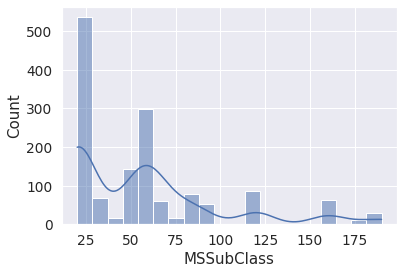

*********************************


*********************************
***********
LotFrontage | type: float64
***********
There are 110 different values.
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
65.0     44
85.0     40
Name: LotFrontage, dtype: int64
***********
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


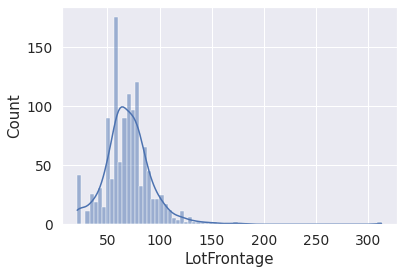

*********************************


*********************************
***********
LotArea | type: int64
***********
There are 1073 different values.
7200     25
9600     24
6000     17
9000     14
8400     14
10800    14
1680     10
Name: LotArea, dtype: int64
***********
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


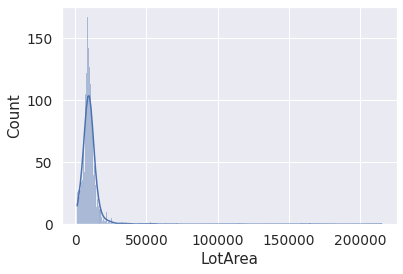

*********************************


*********************************
***********
OverallQual | type: int64
***********
There are 10 different values.
5    397
6    374
7    319
8    168
4    116
9     43
3     20
Name: OverallQual, dtype: int64
***********
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


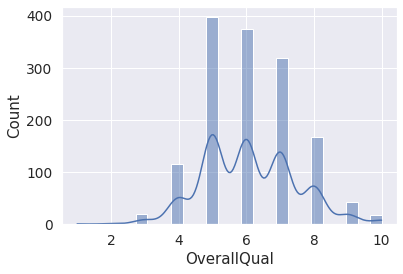

*********************************


*********************************
***********
OverallCond | type: int64
***********
There are 9 different values.
5    821
6    252
7    205
8     72
4     57
3     25
9     22
Name: OverallCond, dtype: int64
***********
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


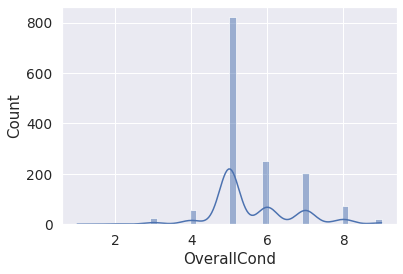

*********************************


*********************************
***********
YearBuilt | type: int64
***********
There are 112 different values.
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
Name: YearBuilt, dtype: int64
***********
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


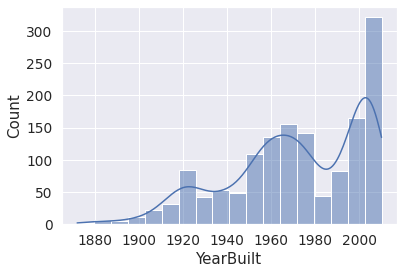

*********************************


*********************************
***********
YearRemodAdd | type: int64
***********
There are 61 different values.
1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
Name: YearRemodAdd, dtype: int64
***********
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


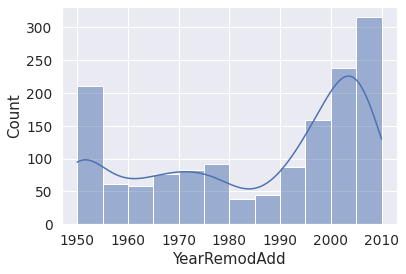

*********************************


*********************************
***********
MasVnrArea | type: float64
***********
There are 327 different values.
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
16.0       7
200.0      6
Name: MasVnrArea, dtype: int64
***********
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


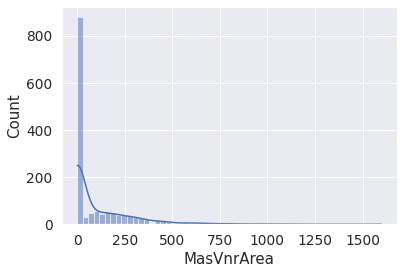

*********************************


*********************************
***********
BsmtFinSF1 | type: int64
***********
There are 637 different values.
0      467
24      12
16       9
686      5
662      5
20       5
936      5
Name: BsmtFinSF1, dtype: int64
***********
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


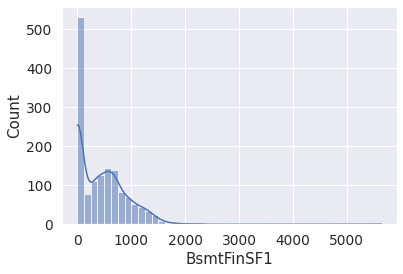

*********************************


*********************************
***********
BsmtFinSF2 | type: int64
***********
There are 144 different values.
0      1293
180       5
374       3
551       2
147       2
294       2
391       2
Name: BsmtFinSF2, dtype: int64
***********
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


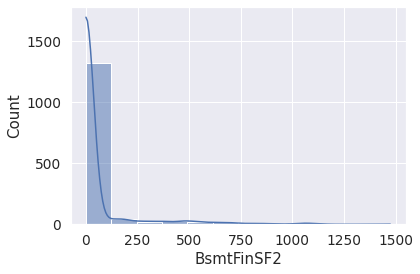

*********************************


*********************************
***********
BsmtUnfSF | type: int64
***********
There are 780 different values.
0      118
728      9
384      8
600      7
300      7
572      7
270      6
Name: BsmtUnfSF, dtype: int64
***********
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


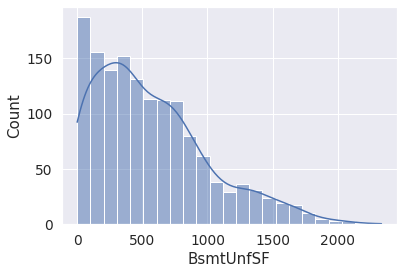

*********************************


*********************************
***********
TotalBsmtSF | type: int64
***********
There are 721 different values.
0       37
864     35
672     17
912     15
1040    14
816     13
768     12
Name: TotalBsmtSF, dtype: int64
***********
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


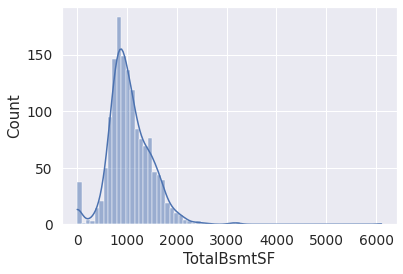

*********************************


*********************************
***********
1stFlrSF | type: int64
***********
There are 753 different values.
864     25
1040    16
912     14
894     12
848     12
672     11
630      9
Name: 1stFlrSF, dtype: int64
***********
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


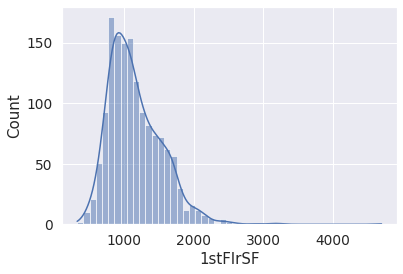

*********************************


*********************************
***********
2ndFlrSF | type: int64
***********
There are 417 different values.
0      829
728     10
504      9
546      8
672      8
600      7
720      7
Name: 2ndFlrSF, dtype: int64
***********
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


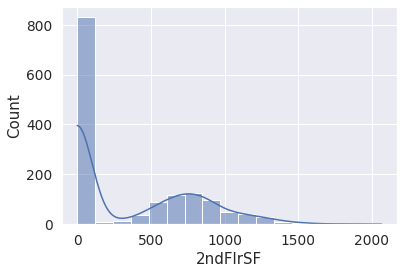

*********************************


*********************************
***********
LowQualFinSF | type: int64
***********
There are 24 different values.
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
Name: LowQualFinSF, dtype: int64
***********
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


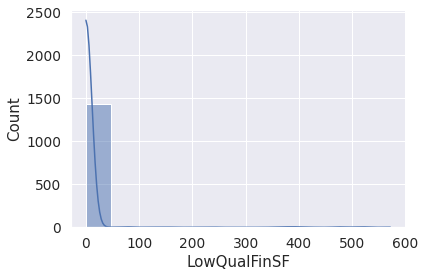

*********************************


*********************************
***********
GrLivArea | type: int64
***********
There are 861 different values.
864     22
1040    14
894     11
1456    10
848     10
1200     9
912      9
Name: GrLivArea, dtype: int64
***********
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


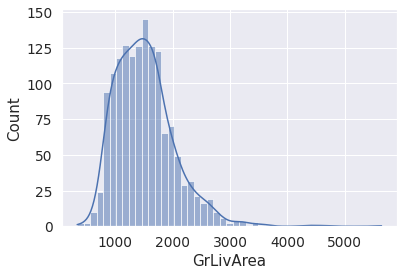

*********************************


*********************************
***********
BsmtFullBath | type: int64
***********
There are 4 different values.
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
***********
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


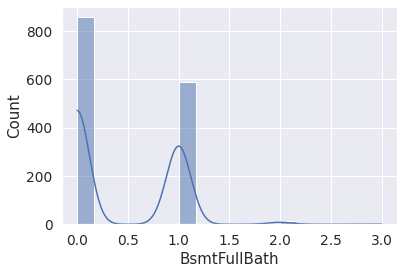

*********************************


*********************************
***********
BsmtHalfBath | type: int64
***********
There are 3 different values.
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
***********
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


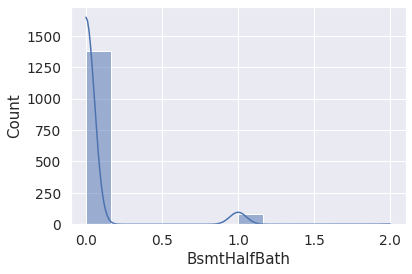

*********************************


*********************************
***********
FullBath | type: int64
***********
There are 4 different values.
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
***********
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


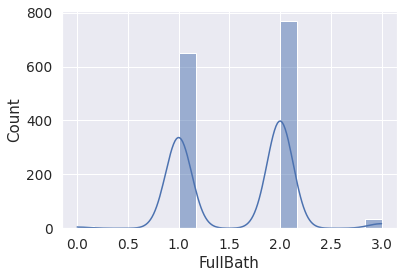

*********************************


*********************************
***********
HalfBath | type: int64
***********
There are 3 different values.
0    913
1    535
2     12
Name: HalfBath, dtype: int64
***********
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


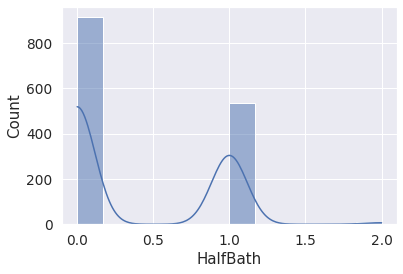

*********************************


*********************************
***********
BedroomAbvGr | type: int64
***********
There are 8 different values.
3    804
2    358
4    213
1     50
5     21
6      7
0      6
Name: BedroomAbvGr, dtype: int64
***********
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


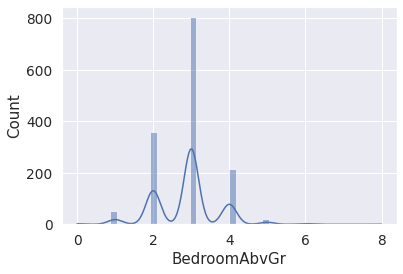

*********************************


*********************************
***********
KitchenAbvGr | type: int64
***********
There are 4 different values.
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
***********
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


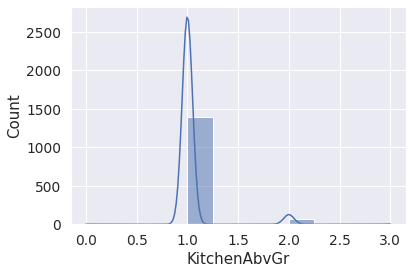

*********************************


*********************************
***********
TotRmsAbvGrd | type: int64
***********
There are 12 different values.
6     402
7     329
5     275
8     187
4      97
9      75
10     47
Name: TotRmsAbvGrd, dtype: int64
***********
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


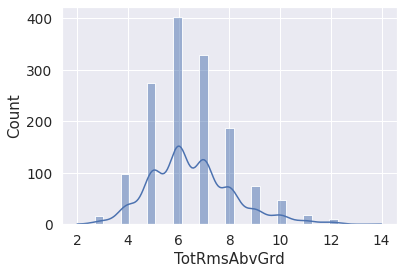

*********************************


*********************************
***********
Fireplaces | type: int64
***********
There are 4 different values.
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
***********
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


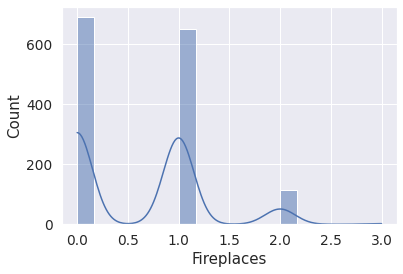

*********************************


*********************************
***********
GarageYrBlt | type: float64
***********
There are 97 different values.
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
Name: GarageYrBlt, dtype: int64
***********
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


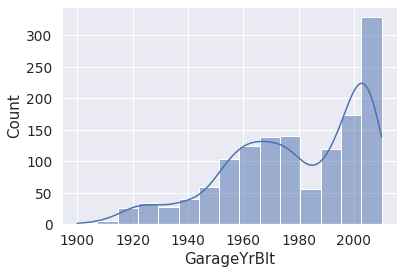

*********************************


*********************************
***********
GarageCars | type: int64
***********
There are 5 different values.
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
***********
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


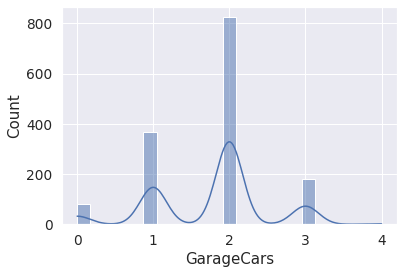

*********************************


*********************************
***********
GarageArea | type: int64
***********
There are 441 different values.
0      81
440    49
576    47
240    38
484    34
528    33
288    27
Name: GarageArea, dtype: int64
***********
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


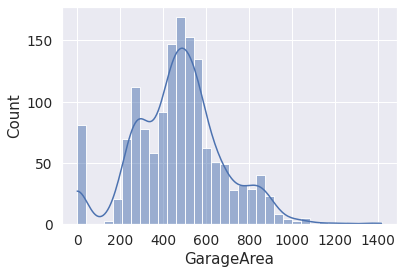

*********************************


*********************************
***********
WoodDeckSF | type: int64
***********
There are 274 different values.
0      761
192     38
100     36
144     33
120     31
168     28
140     15
Name: WoodDeckSF, dtype: int64
***********
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


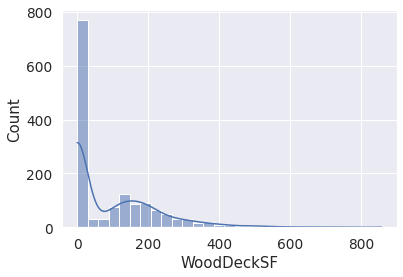

*********************************


*********************************
***********
OpenPorchSF | type: int64
***********
There are 202 different values.
0     656
36     29
48     22
20     21
40     19
45     19
24     16
Name: OpenPorchSF, dtype: int64
***********
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


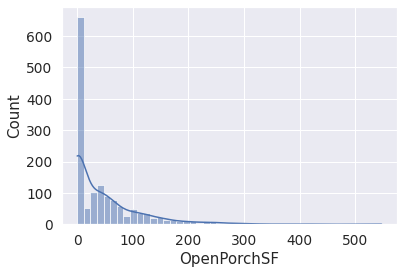

*********************************


*********************************
***********
EnclosedPorch | type: int64
***********
There are 120 different values.
0      1252
112      15
96        6
192       5
144       5
120       5
216       5
Name: EnclosedPorch, dtype: int64
***********
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


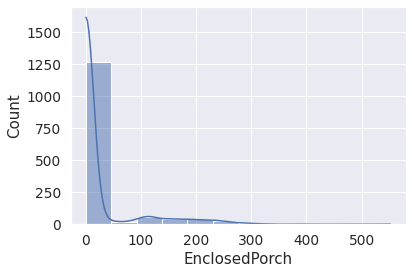

*********************************


*********************************
***********
3SsnPorch | type: int64
***********
There are 20 different values.
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
Name: 3SsnPorch, dtype: int64
***********
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


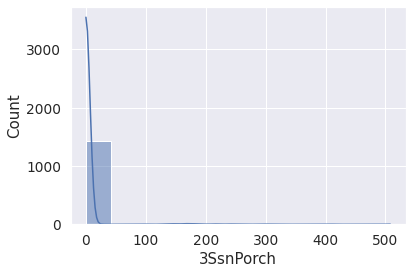

*********************************


*********************************
***********
ScreenPorch | type: int64
***********
There are 76 different values.
0      1344
192       6
120       5
224       5
189       4
180       4
147       3
Name: ScreenPorch, dtype: int64
***********
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


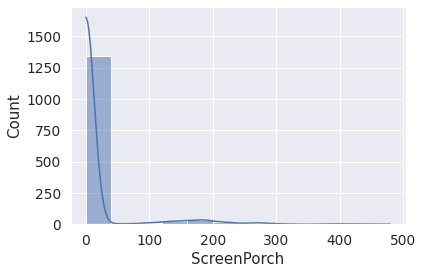

*********************************


*********************************
***********
PoolArea | type: int64
***********
There are 8 different values.
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
Name: PoolArea, dtype: int64
***********
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


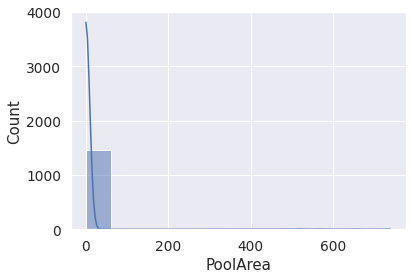

*********************************


*********************************
***********
MiscVal | type: int64
***********
There are 21 different values.
0       1408
400       11
500        8
700        5
450        4
600        4
2000       4
Name: MiscVal, dtype: int64
***********
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


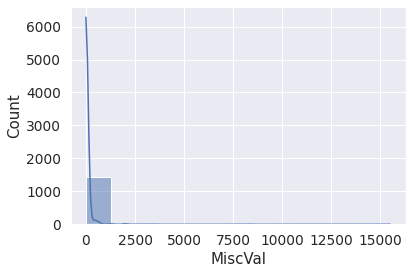

*********************************


*********************************
***********
MoSold | type: int64
***********
There are 12 different values.
6     253
7     234
5     204
4     141
8     122
3     106
10     89
Name: MoSold, dtype: int64
***********
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


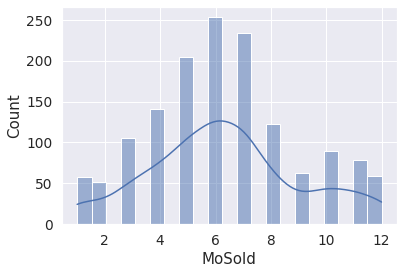

*********************************


*********************************
***********
YrSold | type: int64
***********
There are 5 different values.
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
***********
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


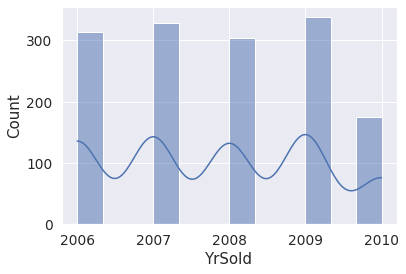

*********************************


*********************************
***********
SalePrice | type: int64
***********
There are 663 different values.
140000    20
135000    17
155000    14
145000    14
190000    13
110000    13
115000    12
Name: SalePrice, dtype: int64
***********
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


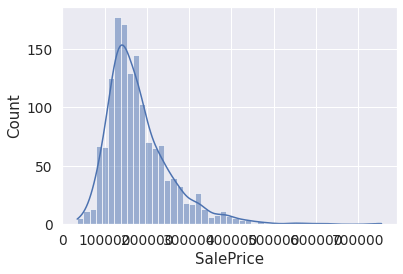

*********************************



In [26]:
des_df(X_test)

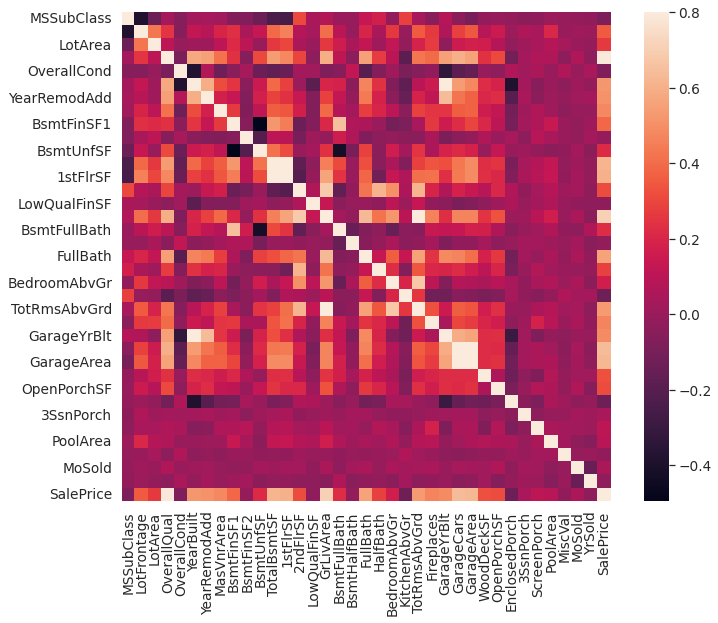

In [27]:
#correlation matrix
corrmat = X_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


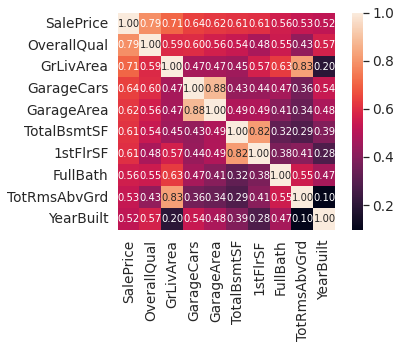

In [28]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [29]:
df.isnull().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [30]:
df_input = df[cols].copy()

In [31]:
df_input

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,1542,2073,2,7,1978
1457,266500,7,2340,1,252,1152,1188,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


# Train / fit pro lineární Regresi
Kde pracujeme pouze s 10 nejlépe korelujícími sloupci

In [32]:
#train and fit pro trénovací a validační

y = df_input['SalePrice']
X = df_input.drop(['SalePrice'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print(X_train)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
254             5       1314           1         294         1314      1314   
1066            6       1571           2         380          799       799   
638             5        796           0           0          796       796   
799             5       1768           1         240          731       981   
380             5       1691           1         308         1026      1026   
...           ...        ...         ...         ...          ...       ...   
1095            6       1314           2         440         1314      1314   
1130            4       1981           2         576         1122      1328   
1294            5        864           2         572          864       864   
860             7       1426           1         216          912       912   
1126            7       1555           3         660         1373      1555   

      FullBath  TotRmsAbvGrd  YearBuilt  
254      

In [34]:
m = LinearRegression()
m.fit(X_train,y_train)

print(mean_squared_error(y_train, m.predict(X_train), squared=False))
mean_squared_error(y_val, m.predict(X_val), squared=False)

37784.11325091935


39568.64464628705

# Příprava dat na Decision Tree Regressor

In [35]:
df_dt = df.copy()
df_dt.isnull().sum().sort_values(ascending = False)[0:3]
df_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Drop textových a prázdných sloupců**

In [36]:
df_dt = df.select_dtypes(exclude=['object'])
df_dt.drop('LotFrontage',inplace=True, axis=1)
df_dt.drop('GarageYrBlt',inplace=True, axis=1)
df_dt.drop('MasVnrArea',inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_dt.isnull().sum().sort_values(ascending = False)[0:3]

Id              0
OpenPorchSF     0
KitchenAbvGr    0
dtype: int64

In [38]:
df_dt

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


# Decision Tree

In [39]:
df_dt_Id = df_dt[["Id"]]
df_dt.drop('Id', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
y_dt = df_dt['SalePrice'].copy()
X_dt = df_dt.drop(['SalePrice'], axis=1)
X_train_dt, X_val_dt, y_train_dt, y_val_dt = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 42)
m_dectree = DecisionTreeRegressor(min_samples_split=20)
m_dectree.fit(X_train_dt, y_train_dt)
print(mean_squared_error(y_train_dt, m_dectree.predict(X_train_dt), squared=False))
mean_squared_error(y_val_dt, m_dectree.predict(X_val_dt), squared=False)

20011.249532639053


39128.80481404506

# Random Forrest

In [41]:
y_rf = df_dt['SalePrice'].copy()
X_rf = df_dt.drop(['SalePrice'], axis=1)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)
m_rf = RandomForestRegressor(n_estimators=100)
m_rf.fit(X_train_rf, y_train_rf)
print(mean_squared_error(y_train_rf, m_rf.predict(X_train_rf), squared=False))
mean_squared_error(y_val_rf, m_rf.predict(X_val_rf), squared=False)

11303.878825778895


28624.067794699957

In [42]:
X_rf

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


# Lineární regrese s daty bez Object a bez nulových hodnot

In [43]:

y_lin = df_dt['SalePrice'].copy()
X_lin = df_dt.drop(['SalePrice'], axis=1)
X_train_lin, X_val_lin, y_train_lin, y_val_lin = train_test_split(X_lin, y_lin, test_size = 0.2, random_state = 42)
m = LinearRegression()
m.fit(X_train_lin,y_train_lin)

print(mean_squared_error(y_train_lin, m.predict(X_train_lin), squared=False))
mean_squared_error(y_val_lin, m.predict(X_val_lin), squared=False)

34241.16989411426


37312.271522960364

# Výstup 

In [44]:
# ??? výsledek,
X_test = df_test.select_dtypes(exclude=['object'])
X_test_Id = X_test[["Id"]]
X_test.drop('Id', inplace=True, axis=1)
X_test_Id

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [45]:
y_pred =  m_rf.predict(X_rf)
print(y_pred.shape)
print(X_test_Id.shape)

(1460,)
(1459, 1)


In [46]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006
